<a href="https://colab.research.google.com/github/AbiramiSridharan/Time-series-ML--mini-project-on-stock-market-data/blob/main/E_commerce_comp_stock_time_series_modified1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import matplotlib.dates as mtd
import seaborn as sns
%matplotlib inline

Task1:
upload data set

In [ ]:
dfquarters=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/EcommerceQuarterlyConsolidate.csv')
dfprofitloss=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/EcommerceProfitlossConsolidate.csv')

dfquarters.head()

,Date,Sales,Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Operating Profit,Company Name
0,2018-12-31,133.6,106.1,13.4,1.2,NaN,39.7,12.0,27.7,27.5,INDIAMART INTERMESH LTD
1,2019-03-31,138.0,117.9,14.8,1.2,NaN,33.7,5.5,28.2,20.1,INDIAMART INTERMESH LTD
2,2019-06-30,147.3,110.6,14.3,4.4,0.4,46.2,13.8,32.4,36.7,INDIAMART INTERMESH LTD
3,2019-09-30,156.6,120.5,20.5,5.0,0.7,50.9,42.2,8.7,36.1,INDIAMART INTERMESH LTD
4,2019-12-31,164.9,122.0,16.6,5.8,0.5,53.2,-8.8,62.0,42.9,INDIAMART INTERMESH LTD


In [ ]:
dfquarters = dfquarters.rename(columns = {' Date': 'Date'}, inplace = False)

In [ ]:
dfprofitloss.head()


,Date,Sales,Expenses,Operating Profit,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Company Name
0,2015-03-31,176.07,216.41,-40.34,11.96,3.02,0.47,-31.87,0.02,-31.89,INDIAMART INTERMESH LTD
1,2016-03-31,254.29,369.78,-115.49,4.75,3.67,1.04,-115.45,0.45,-115.91,INDIAMART INTERMESH LTD
2,2017-03-31,317.76,391.44,-73.68,14.17,4.63,-,-64.14,0.20,-64.35,INDIAMART INTERMESH LTD
3,2018-03-31,410.51,486.74,-76.23,19.02,2.89,-,-60.10,-114.86,54.76,INDIAMART INTERMESH LTD
4,2019-03-31,507.42,490.34,17.08,40.97,4.13,-,53.92,33.88,20.04,INDIAMART INTERMESH LTD


In [ ]:
dfprofitloss.describe()

,Sales,Expenses,Operating Profit,Other Income,Depreciation,Profit before tax,Tax,Net profit
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,472.447750,418.408000,54.039750,109.602750,16.214000,145.141250,36.017750,112.757500
std,359.378266,352.052129,116.544772,274.118992,17.134242,291.443527,49.260373,257.253917
min,0.000000,0.300000,-350.520000,-0.170000,0.060000,-125.760000,-114.860000,-237.620000
25%,177.165000,148.570000,0.382500,2.795000,0.832500,1.645000,0.570000,1.140000
50%,435.900000,366.365000,16.360000,37.710000,8.670000,56.735000,34.510000,37.595000
75%,722.080000,611.077500,123.622500,86.707500,29.997500,191.127500,57.787500,139.822500
max,1311.930000,1662.450000,325.500000,1583.510000,52.070000,1589.310000,180.500000,1407.080000


In [ ]:
dfquarters.describe()

,Sales,Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Operating Profit
count,45.000000,45.000000,45.000000,45.000000,43.000000,45.000000,45.000000,45.000000,45.000000
mean,161.869556,142.955111,10.981111,67.066222,5.400465,15.845556,71.536889,23.035778,67.240000
std,103.281258,120.635310,48.064417,152.508512,5.529777,30.467596,147.506677,25.923481,136.937735
min,5.500000,6.770000,-164.150000,0.020000,0.070000,0.040000,-150.120000,0.000000,-187.580000
25%,52.890000,51.470000,0.330000,1.000000,0.240000,0.570000,0.620000,1.310000,0.650000
50%,164.900000,118.500000,13.400000,5.000000,1.800000,1.490000,23.400000,17.990000,36.700000
75%,240.170000,175.310000,36.190000,32.240000,11.865000,2.520000,80.690000,29.230000,76.940000
max,335.060000,483.890000,104.020000,737.740000,13.630000,106.500000,697.040000,118.890000,679.170000


**Checking NULL values**

In [ ]:
dfprofitloss['Date']=pd.to_datetime(dfprofitloss['Date'])
dfprofitloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               40 non-null     datetime64[ns]
 1   Sales              40 non-null     float64       
 2   Expenses           40 non-null     float64       
 3   Operating Profit   40 non-null     float64       
 4   Other Income       40 non-null     float64       
 5   Depreciation       40 non-null     float64       
 6   Interest           40 non-null     object        
 7   Profit before tax  40 non-null     float64       
 8   Tax                40 non-null     float64       
 9   Net profit         40 non-null     float64       
 10  Company Name       40 non-null     object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 3.6+ KB


In [ ]:
dfquarters['Date']=pd.to_datetime(dfquarters['Date'])
dfquarters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 45 non-null     datetime64[ns]
 1    Sales               45 non-null     float64       
 2    Expenses            45 non-null     float64       
 3    Other Income        45 non-null     float64       
 4    Depreciation        45 non-null     float64       
 5    Interest            43 non-null     float64       
 6    Profit before tax   45 non-null     float64       
 7    Tax                 45 non-null     float64       
 8    Net profit          45 non-null     float64       
 9    Operating Profit    45 non-null     float64       
 10  Company Name         45 non-null     object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 4.0+ KB


**null values in date wise are not exposed, so we can group it and analyse**

In [ ]:
dfprofitloss.groupby('Company Name').count()

,Date,Sales,Expenses,Operating Profit,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit
Company Name,,,,,,,,,,
INDIAMART INTERMESH LTD,7,7,7,7,7,7,7,7,7,7
INFO EDGE (INDIA) LTD,10,10,10,10,10,10,10,10,10,10
JUST DIAL LTD,10,10,10,10,10,10,10,10,10,10
NURECA LTD,3,3,3,3,3,3,3,3,3,3
OLYMPIA INDUSTRIES LTD,10,10,10,10,10,10,10,10,10,10


In [ ]:
dfquarters.groupby('Company Name').count()

,Date,Sales,Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Operating Profit
Company Name,,,,,,,,,,
INDIAMART INTERMESH LTD,10,10,10,10,10,8,10,10,10,10
INFO EDGE (INDIA) LTD,10,10,10,10,10,10,10,10,10,10
JUST DIAL LTD,10,10,10,10,10,10,10,10,10,10
NURECA LTD,5,5,5,5,5,5,5,5,5,5
OLYMPIA INDUSTRIES LTD,10,10,10,10,10,10,10,10,10,10


# ProfitLoss--> Expenses Analysis

In [ ]:
'''with plt.xkcd():
    fig, ax=plt.subplots(nrows=5, figsize=[20,20], sharex=True, sharey=True)
    ax=ax.flatten()

    for i,s in enumerate(dfprofitloss['Company Name'].unique()):
        data1=dfprofitloss[dfprofitloss['Company Name']==s][['Date','Expenses']]
        sns.lineplot(data=data1, x='Date',y='Expenses', ax=ax[i])
        ax[i].set_title(s)'''

"with plt.xkcd():\n    fig, ax=plt.subplots(nrows=5, figsize=[20,20], sharex=True, sharey=True)\n    ax=ax.flatten()\n\n    for i,s in enumerate(dfprofitloss['Company Name'].unique()):\n        data1=dfprofitloss[dfprofitloss['Company Name']==s][['Date','Expenses']]\n        sns.lineplot(data=data1, x='Date',y='Expenses', ax=ax[i])\n        ax[i].set_title(s)"

In [ ]:
import plotly.express as px
with plt.xkcd():
  fig = px.area(dfprofitloss,x='Date',y='Expenses',facet_col="Company Name", facet_col_wrap=2,color="Company Name",height=1000)
  fig.show()

In [ ]:
cols = dfprofitloss[["Date","Sales",'Expenses','Operating Profit','Net profit','Company Name']]
newdfPL=cols.copy()
newdfPL.sort_values('Date', ascending=True, ignore_index=True, inplace=True)
newdfPL

,Date,Sales,Expenses,Operating Profit,Net profit,Company Name
0,2011-03-31,1.02,0.79,0.23,0.00,OLYMPIA INDUSTRIES LTD
1,2011-03-31,179.60,138.55,41.05,28.82,JUST DIAL LTD
2,2012-03-31,259.40,194.78,64.62,52.28,JUST DIAL LTD
3,2012-03-31,391.88,274.45,117.43,103.33,INFO EDGE (INDIA) LTD
4,2012-03-31,0.00,0.30,-0.30,-0.43,OLYMPIA INDUSTRIES LTD
5,2013-03-31,0.09,0.34,-0.25,-0.28,OLYMPIA INDUSTRIES LTD
6,2013-03-31,472.32,362.95,109.37,91.59,INFO EDGE (INDIA) LTD
7,2014-03-31,461.29,319.09,142.20,120.61,JUST DIAL LTD
8,2014-03-31,6.59,6.23,0.36,0.36,OLYMPIA INDUSTRIES LTD
9,2014-03-31,567.22,473.18,94.04,89.67,INFO EDGE (INDIA) LTD


In [ ]:
#newdfPL['Date']=newdfPL['Date'].astype(str)

In [ ]:
newdfPL['year'] = newdfPL['Date'].dt.year
fig = px.bar(newdfPL, x='Date', y='Expenses',hover_name='Expenses', animation_frame='Company Name',color='Company Name',width=1300,height=600)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000
fig.update_layout(xaxis={'categoryorder':'total descending'},)
fig.show()


# ProfitLoss--> Sale **Analysis**

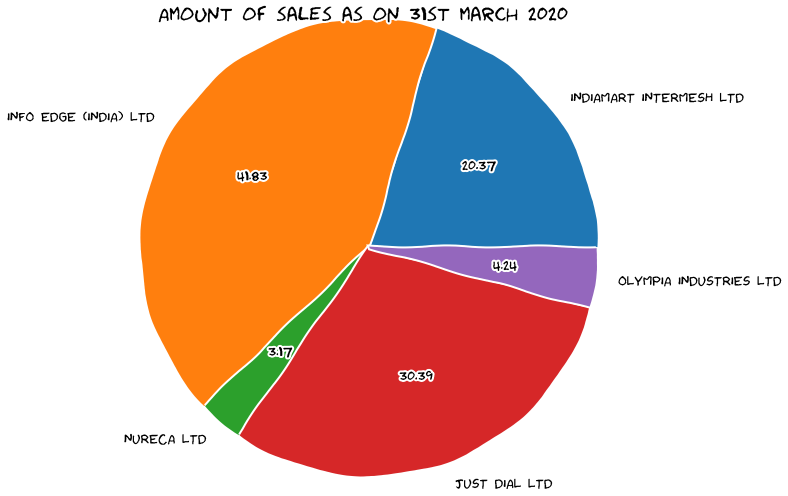

In [ ]:
with plt.xkcd():
    fig=plt.figure(figsize=(7,7))
    plt.pie(x=dfprofitloss[dfprofitloss['Date']=='2020-03-31']['Sales'], labels=dfprofitloss[dfprofitloss['Date']=='2020-03-31']['Company Name'], autopct='%.2f',radius=1.5);
    plt.suptitle("Amount of sales as on 31st march 2020",size=20)

In [ ]:
newdfPL['year'] = newdfPL['Date'].dt.year
fig = px.bar(newdfPL, x='Date', y='Sales', animation_frame='Company Name',hover_name='Sales',color='Company Name',width=1300,height=600)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']["duration"] = 3000
fig.update_layout(xaxis={'categoryorder':'total descending'},)
fig.show()

Seperate Data frame for all companies

In [ ]:
df_indmart_pl= dfprofitloss[dfprofitloss['Company Name']=='INDIAMART INTERMESH LTD']


In [ ]:
df_info_pl= dfprofitloss[dfprofitloss['Company Name']=='INFO EDGE (INDIA) LTD']


In [ ]:
df_jd_pl= dfprofitloss[dfprofitloss['Company Name']=='JUST DIAL LTD']


In [ ]:
df_nur_pl= dfprofitloss[dfprofitloss['Company Name']=='NURECA LTD']

In [ ]:
df_olymp_pl= dfprofitloss[dfprofitloss['Company Name']=='OLYMPIA INDUSTRIES LTD']

**IndiaMart Net profit trend**

In [ ]:
df_indmart_pl_Net=df_indmart_pl.iloc[:,[0,9]]

In [ ]:
df_indmart_pl_Net.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7 non-null      datetime64[ns]
 1   Net profit  7 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.0 bytes


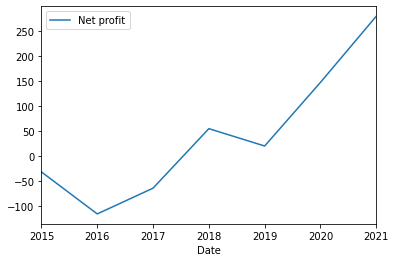

In [ ]:
df_indmart_pl_Net.plot('Date','Net profit')

**IndiaMart company profit loss --> Net profit Prediction**

In [ ]:
from fbprophet import Prophet
# Initialize the Model
model=Prophet()

In [ ]:
df_indmart_pl_Net.columns = ['ds','y']
df_indmart_pl_Net.head()

,ds,y
0,2015-03-31,-31.89
1,2016-03-31,-115.91
2,2017-03-31,-64.35
3,2018-03-31,54.76
4,2019-03-31,20.04


In [ ]:
model.fit(df_indmart_pl_Net)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


In [ ]:
future_dates=model.make_future_dataframe(periods=4,freq='Y')

In [ ]:
prediction=model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-03-31,-17.754969,-186.152392,-39.796130,-17.754969,-17.754969,-94.268245,-94.268245,-94.268245,-94.268245,-94.268245,-94.268245,0.0,0.0,0.0,-112.023214
1,2016-03-31,38.921427,-162.429551,-8.734700,38.921427,38.921427,-125.591424,-125.591424,-125.591424,-125.591424,-125.591424,-125.591424,0.0,0.0,0.0,-86.669997
2,2017-03-31,95.442969,-94.111061,55.712049,95.442969,95.442969,-114.927485,-114.927485,-114.927485,-114.927485,-114.927485,-114.927485,0.0,0.0,0.0,-19.484517
3,2018-03-31,151.964511,-25.132705,122.687809,151.964511,151.964511,-104.482195,-104.482195,-104.482195,-104.482195,-104.482195,-104.482195,0.0,0.0,0.0,47.482316
4,2019-03-31,208.486053,38.970943,184.391226,208.486053,208.486053,-94.268245,-94.268245,-94.268245,-94.268245,-94.268245,-94.268245,0.0,0.0,0.0,114.217808
5,2020-03-31,265.162449,69.403454,209.294900,265.162449,265.162449,-125.591424,-125.591424,-125.591424,-125.591424,-125.591424,-125.591424,0.0,0.0,0.0,139.571025
6,2021-03-31,321.683991,134.032688,285.529965,321.683991,321.683991,-114.927485,-114.927485,-114.927485,-114.927485,-114.927485,-114.927485,0.0,0.0,0.0,206.756506
7,2021-12-31,364.268715,317.146044,462.027996,364.268715,364.268715,25.395400,25.395400,25.395400,25.395400,25.395400,25.395400,0.0,0.0,0.0,389.664115
8,2022-12-31,420.790257,369.983019,512.847030,420.790257,420.790258,21.831405,21.831405,21.831405,21.831405,21.831405,21.831405,0.0,0.0,0.0,442.621662
9,2023-12-31,477.311799,425.955520,569.571913,477.311798,477.311801,18.308225,18.308225,18.308225,18.308225,18.308225,18.308225,0.0,0.0,0.0,495.620024


In [ ]:
y_true = df_indmart_pl_Net['y'][-4:].values
y_true

array([ 54.76,  20.04, 147.38, 279.8 ])

In [ ]:
y_predfb =prediction['yhat'][-4:].values
y_predfb

array([389.66411481, 442.62166243, 495.62002412, 562.98154437])

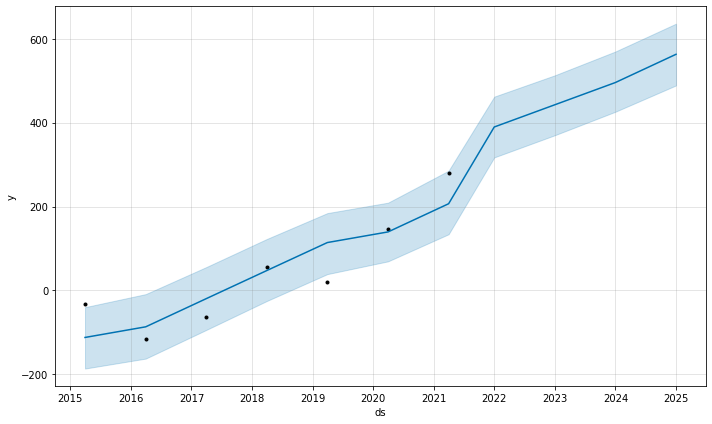

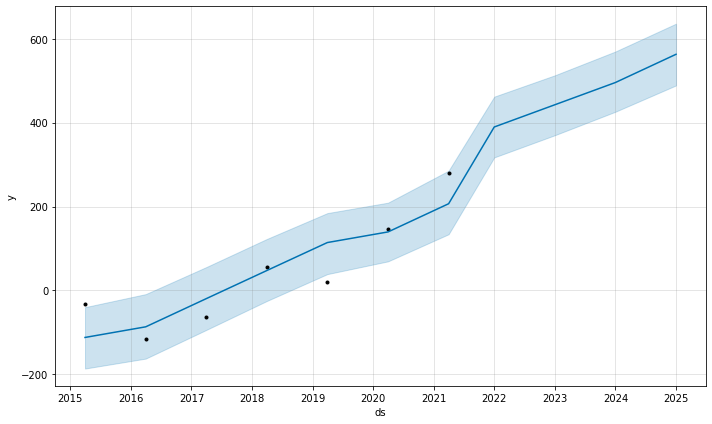

In [ ]:
model.plot(prediction)

In [ ]:
print("FB Prophet")
msefb = mean_squared_error(y_true, y_predfb)
print('MSE-FB prophet: '+str(msefb))
maefb= mean_absolute_error(y_true, y_predfb)
print('MAE-FB prophet: '+str(maefb))
rmsefb = math.sqrt(mean_squared_error(y_true, y_predfb))
print('RMSE-FB prophet: '+str(rmsefb))
mapefb = np.mean(np.abs(y_predfb -y_true)/np.abs(y_true))
print('MAPE-FB prophet: '+str(mapefb))

FB Prophet
MSE-FB prophet: 123049.73224992254
MAE-FB prophet: 347.22683642886483
RMSE-FB prophet: 350.7844526912824
MAPE-FB prophet: 7.644429903608943


# **Multiple Time Series using FB Prophet**

**Sales Prediction for Top 5 Companies**

In [ ]:
compgrpPLsale=dfprofitloss[['Date','Sales','Expenses','Net profit','Company Name']].rename({'Date':'ds','Sales':'y'},axis='columns')
compgrpPLsale.head(5)

In [ ]:
companies=compgrpPLsale.groupby('Company Name')


In [ ]:
target=pd.DataFrame()

In [ ]:
from sklearn.metrics import mean_squared_error

for company in companies.groups:
  group=companies.get_group(company)
  m=Prophet(interval_width=0.80)
  m.fit(group)
  forecast=m.predict()
  future=m.make_future_dataframe(periods=4,freq='Y')
  forecast=m.predict(future)
  forecast
  m.plot(forecast,xlabel='ds_'+company)
  forecast=forecast.rename(columns={'yhat':'yhat_'+company})
  target=pd.merge(target,forecast.set_index('ds'),how='outer',left_index=True,right_index=True)
  
  #mse = mean_squared_error(compgrpPLsale['y'],'yhat_'+company)
  #print('MSE: '+str(mse))

**Net Profit Prediction for Top 5 companies**

In [ ]:
compgrpPLnet=dfprofitloss[['Date','Sales','Expenses','Net profit','Company Name']].rename({'Date':'ds','Net profit':'y'},axis='columns')
compgrpPLnet.head(5)

In [ ]:
companies1=compgrpPLnet.groupby('Company Name')

In [ ]:
target1=pd.DataFrame()

In [ ]:
for company in companies1.groups:
  group=companies1.get_group(company)
  m1=Prophet(interval_width=0.95)
  m1.fit(group)
  future1=m.make_future_dataframe(periods=4,freq='Y')
  forecast1=m1.predict(future1)
  m1.plot(forecast1,xlabel='ds_'+company)
  forecast1=forecast1.rename(columns={'yhat':'yhat_'+company})
  target1=pd.merge(target1,forecast1.set_index('ds'),how='outer',left_index=True,right_index=True)

# Profit loss--> Cumulative Net Profit for all companies, **Yearwise**

In [ ]:
sum=dfprofitloss.groupby([dfprofitloss['Date']])['Sales','Expenses','Operating Profit','Net profit'].sum()
sum

In [ ]:

sum.plot(figsize=(20,10))

In [ ]:
SumNet=pd.DataFrame(sum).reset_index()
SumNet = SumNet.rename(columns = {'Net profit': 'SumNetProfit'}, inplace = False)
SumNet

**Cumulative  year wise Trend NET PROFIT**

In [ ]:
import seaborn as sns

In [ ]:
fig=plt.figure(figsize=(15,8))

ax=sns.lineplot(data=SumNet,x='Date',y='SumNetProfit')

Prediction--> FB Prophet

In [ ]:
from fbprophet import Prophet
# Initialize the Model
model1=Prophet()

In [ ]:
dfsumnetprofit=SumNet.iloc[:,[0,4]]
dfsumnetprofit

In [ ]:
dfsumnetprofit.columns = ['ds','y']
dfsumnetprofit.head()

In [ ]:
model1.fit(dfsumnetprofit)

In [ ]:
future_dates1=model1.make_future_dataframe(periods=4,freq='Y')

In [ ]:
prediction1=model1.predict(future_dates1)
prediction1

In [ ]:
model1.plot(prediction1)